In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [2]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "sessions_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "sessions_labels_df.pkl"))

In [3]:
# Remove all the features that are not contains 'Pre' in their name
features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

In [4]:
features_df.head()

,Gaze_Counts_In_RoI_Pre,Gaze_Counts_Out_RoI_Pre,Gaze_In_out_RoI_Ratio_Pre,Gaze_Re_Entries_To_RoI_Count_Pre,Gaze_Re_Entries_To_RoI_Rate_Pre,Fixations_Counts_In_RoI_Pre,Fixations_Counts_Out_RoI_Pre,Fixations_In_out_RoI_Ratio_Pre,Fixations_Re_Entries_To_RoI_Count_Pre,Fixations_Re_Entries_To_RoI_Rate_Pre,...,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,84.0,2269.0,0.037021,1.0,0.193573,1.0,17.0,0.058824,1.0,0.193573,...,8.000536,0.058651,50335.399961,21.051282,21.909922,3.193094,24.634348,9.617290,0.752620,378.923078
1,229.0,3640.0,0.062912,3.0,0.367377,2.0,25.0,0.080000,2.0,0.244918,...,4.347439,0.119076,80628.921965,20.493043,23.339909,7.694430,32.282188,4.772942,1.480794,553.312157
2,250.0,4259.0,0.058699,5.0,0.554473,1.0,16.0,0.062500,1.0,0.110895,...,6.337612,0.036290,48509.025467,10.318725,9.961956,2.459129,17.024339,7.030213,0.596426,175.418318
3,183.0,1364.0,0.134164,2.0,0.646800,2.0,7.0,0.285714,1.0,0.323400,...,0.828320,0.126263,21541.316228,11.921904,11.232829,5.862942,19.085051,3.120651,1.954314,107.297137
4,254.0,3716.0,0.068353,1.0,0.123716,2.0,20.0,0.100000,1.0,0.123716,...,0.646858,0.059786,44934.492756,11.137369,11.046135,4.374994,17.567793,0.823106,0.932752,245.022113


In [5]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7248 entries, 0 to 7247
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Gaze_Counts_In_RoI_Pre                        7049 non-null   float64
 1   Gaze_Counts_Out_RoI_Pre                       7049 non-null   float64
 2   Gaze_In_out_RoI_Ratio_Pre                     7049 non-null   float64
 3   Gaze_Re_Entries_To_RoI_Count_Pre              7049 non-null   float64
 4   Gaze_Re_Entries_To_RoI_Rate_Pre               7049 non-null   float64
 5   Fixations_Counts_In_RoI_Pre                   7048 non-null   float64
 6   Fixations_Counts_Out_RoI_Pre                  7048 non-null   float64
 7   Fixations_In_out_RoI_Ratio_Pre                7048 non-null   float64
 8   Fixations_Re_Entries_To_RoI_Count_Pre         7048 non-null   float64
 9   Fixations_Re_Entries_To_RoI_Rate_Pre          7048 non-null   f

In [6]:
labels_df.head()

,Session
series_id,
0,0
1,1
2,1
3,0
4,0


In [7]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7248 entries, 0 to 7247
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Session  7248 non-null   int32
dtypes: int32(1)
memory usage: 84.9 KB


Data Cleaning

how many missing values are there in each column? show the top 10

In [8]:
features_df.isna().sum(axis=0).sort_values(ascending=False).head(10)

Pupil radius_Fixations_First_Diff_Pre           1448
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre    1448
onset_Max_Saccades_Start_In_RoI_Pre             1083
Duration_Min_Saccades_Start_In_RoI_Pre          1083
peak_velocity_Max_Saccades_Start_In_RoI_Pre     1083
vis_angle_Max_Saccades_Start_In_RoI_Pre         1083
Duration_Max_Saccades_Start_In_RoI_Pre          1083
onset_Std_Saccades_Start_In_RoI_Pre             1083
onset_Min_Saccades_Start_In_RoI_Pre             1083
vis_angle_Min_Saccades_Start_In_RoI_Pre         1083
dtype: int64

Remove columns with more than 30% missing values

In [9]:
features_df = features_df.loc[:, features_df.isna().sum(axis=0) < 0.3 * features_df.shape[0]]

In [10]:
features_df.isna().sum(axis=0).sort_values(ascending=False).head(10)

Pupil radius_Fixations_First_Diff_Pre           1448
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre    1448
onset_Max_Saccades_Start_In_RoI_Pre             1083
Duration_Min_Saccades_Start_In_RoI_Pre          1083
peak_velocity_Max_Saccades_Start_In_RoI_Pre     1083
vis_angle_Max_Saccades_Start_In_RoI_Pre         1083
Duration_Max_Saccades_Start_In_RoI_Pre          1083
onset_Std_Saccades_Start_In_RoI_Pre             1083
onset_Min_Saccades_Start_In_RoI_Pre             1083
vis_angle_Min_Saccades_Start_In_RoI_Pre         1083
dtype: int64

how many missing values are there in each row? show the top 10

In [11]:
features_df.isna().sum(axis=1).sort_values(ascending=False).head(10)

6322    73
1157    73
1196    73
1839    73
6323    73
1846    73
1855    73
2657    73
6334    73
3737    73
dtype: int64

Remove rows with more than 30% missing values

In [12]:
features_df = features_df.loc[features_df.isna().sum(axis=1) < 0.5 * features_df.shape[1], :]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [13]:
features_df.isna().sum(axis=1).sort_values(ascending=False).head(10)

436     32
1824    32
4349    32
1802    30
260     30
2136    30
6352    30
4456    30
4595    30
2241    30
dtype: int64

Train/Test Split
We will split the data into train and test sets before any preprocessing is done. This is to avoid data leakage from the test set into the training set.


In [14]:
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "sessions_series_id_df.pkl"))

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Shuffle the list of subject IDs randomly
random = np.random
random.seed(1)
random.shuffle(subject_ids)

# Split the list of subject IDs into two parts
train_subject_ids = subject_ids[:int(len(subject_ids)*0.9)]
print(train_subject_ids)
test_subject_ids = subject_ids[int(len(subject_ids)*0.9):]
print(test_subject_ids)

# Subset the data based on the split list of subject IDs
train_data = series_id_df[series_id_df[config.SUBJECT].isin(train_subject_ids)]
test_data = series_id_df[series_id_df[config.SUBJECT].isin(test_subject_ids)]

X_train = features_df[features_df.index.isin(train_data.index)]
X_test = features_df[features_df.index.isin(test_data.index)]
y_train = labels_df[labels_df.index.isin(train_data.index)]
y_test = labels_df[labels_df.index.isin(test_data.index)]

['animation_RN85' 'animation_PS08' 'animation_NN81' 'no_nap_TC9'
 'animation_BB30' 'no_nap_DF3' 'no_nap_SK7' 'no_nap_SS1' 'animation_AJ31'
 'animation_MA40' 'no_nap_AH3' 'no_nap_SZ9' 'no_nap_YS4' 'no_nap_LK3'
 'animation_BH27' 'animation_GN10' 'no_nap_AM1' 'animation_ZN05'
 'animation_MN01' 'no_nap_YP2' 'no_nap_VH3' 'animation_ZW57' 'no_nap_MG1'
 'no_nap_RJ0' 'animation_BG97' 'no_nap_AI5' 'animation_DK47' 'no_nap_RA0'
 'animation_MN37' 'no_nap_KS0' 'animation_HR58' 'no_nap_AM5'
 'animation_FY25' 'no_nap_IH1' 'no_nap_AM2' 'no_nap_LG3' 'animation_WE10'
 'animation_HB81' 'animation_HM02' 'no_nap_GA2' 'no_nap_OR1'
 'animation_AI09' 'animation_GE44' 'animation_RY20' 'animation_BO03'
 'no_nap_NT6' 'animation_NY90' 'no_nap_YD1' 'animation_KL89' 'no_nap_LS1'
 'no_nap_DM4' 'no_nap_AL5' 'no_nap_DD2' 'animation_KM28' 'animation_TA01'
 'no_nap_RG9' 'animation_CR06' 'no_nap_AN5' 'animation_KR13'
 'animation_AM45']
['animation_AS20' 'animation_SM28' 'animation_PM15' 'no_nap_BK3'
 'no_nap_NM9' 'anima

In [15]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(features_df,
#                                                     labels_df,
#                                                     random_state=420,
#                                                     test_size=0.2)

In [16]:
X_train.head()

,Gaze_Counts_In_RoI_Pre,Gaze_Counts_Out_RoI_Pre,Gaze_In_out_RoI_Ratio_Pre,Gaze_Re_Entries_To_RoI_Count_Pre,Gaze_Re_Entries_To_RoI_Rate_Pre,Fixations_Counts_In_RoI_Pre,Fixations_Counts_Out_RoI_Pre,Fixations_In_out_RoI_Ratio_Pre,Fixations_Re_Entries_To_RoI_Count_Pre,Fixations_Re_Entries_To_RoI_Rate_Pre,...,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
1,229.0,3640.0,0.062912,3.0,0.367377,2.0,25.0,0.080000,2.0,0.244918,...,4.347439,0.119076,80628.921965,20.493043,23.339909,7.694430,32.282188,4.772942,1.480794,553.312157
2,250.0,4259.0,0.058699,5.0,0.554473,1.0,16.0,0.062500,1.0,0.110895,...,6.337612,0.036290,48509.025467,10.318725,9.961956,2.459129,17.024339,7.030213,0.596426,175.418318
3,183.0,1364.0,0.134164,2.0,0.646800,2.0,7.0,0.285714,1.0,0.323400,...,0.828320,0.126263,21541.316228,11.921904,11.232829,5.862942,19.085051,3.120651,1.954314,107.297137
4,254.0,3716.0,0.068353,1.0,0.123716,2.0,20.0,0.100000,1.0,0.123716,...,0.646858,0.059786,44934.492756,11.137369,11.046135,4.374994,17.567793,0.823106,0.932752,245.022113
7,518.0,3349.0,0.154673,2.0,0.243665,3.0,22.0,0.136364,1.0,0.121832,...,4.047231,0.097785,64682.847312,16.118439,19.482236,6.223567,24.158218,4.381750,1.244713,402.960974


Fill missing values with the mean of the column

In [17]:
# TODO: fill missing values with the mean of the column or zero ?
X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
X_test = X_test.fillna(X_train.mean())

# X_train = X_train.fillna(0) # fill missing values with zero
# X_test = X_test.fillna(0)

Remove columns with low variance (threshold = 5%)

In [18]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object with a variance with a threshold of 0.05
thresholder = VarianceThreshold(threshold=0.05)

# Fit the thresholder to the data
thresholder.fit(X_train)

# Get the indices of the columns that are retained
feature_idx = thresholder.get_support(indices=True)

# Create a list of the names of the retained columns
feature_names = X_train.columns[feature_idx]

# Subset the dataframe to include only the selected columns
X_train = X_train[feature_names]
X_test = X_test[feature_names]


Remove highly correlated features

In [19]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

How many features are left?

In [20]:
X_train.shape

(5786, 57)

Balancing the dataset

In [21]:
y_train.value_counts()

Session
1          2951
0          2835
dtype: int64

Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

# Create separate StandardScaler instances
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# scaler_y.fit(y_train.values.reshape(-1, 1))

# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train = y_train.values.reshape(-1, 1).flatten()
y_test = y_test.values.reshape(-1, 1).flatten()

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

PCA

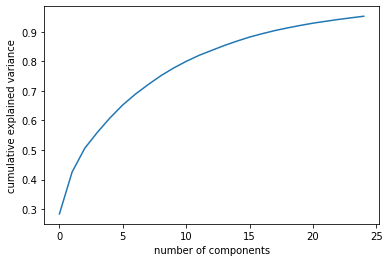

In [23]:
pca = PCA(n_components=0.95).fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [24]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [25]:
X_train_pca

array([[ 0.07414815,  5.24903438, -0.3252113 , ..., -0.63395221,
         0.26334921, -0.42076925],
       [-0.49426047, -0.7109598 , -1.62454942, ...,  0.42595935,
         0.55369804,  1.38885314],
       [ 0.05724083, -0.82951559,  2.3793252 , ..., -0.32051743,
        -0.81282767, -1.0467242 ],
       ...,
       [-3.63672927, -4.03892146,  0.72528752, ...,  0.52950229,
         0.25943453, -0.38817112],
       [-4.09362931, -2.46324413,  0.52445637, ...,  0.29823949,
         0.03363674, -0.16143816],
       [ 4.09014752,  3.71300787, -3.68832596, ..., -0.25881798,
        -0.41621484,  0.05461713]])

LDA

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

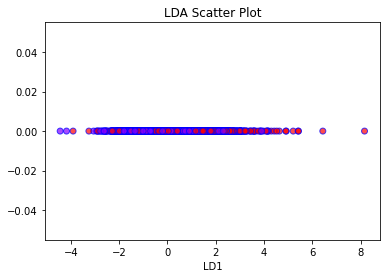

In [27]:
# Create a scatter plot of the transformed data
plt.scatter(X_train_lda, np.zeros(len(X_train_lda)), c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel('LD1')
plt.title('LDA Scatter Plot')
plt.show()

In [28]:
X_train_preprocessed = X_train_pca
X_test_preprocessed = X_test_pca

Classification models

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

Logistic Regression model

In [31]:
from sklearn.linear_model import LogisticRegression

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 0.9, 15)
PENALTY = ['l1', 'l2']
SOLVER = ['liblinear', 'saga']

PARAM_GRID  = {
    'C': C,
    'penalty': PENALTY,
    'solver': SOLVER
}

# Create the logistic regression estimator
estimator = LogisticRegression(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'C': 0.20071428571428573, 'penalty': 'l1', 'solver': 'saga'}

Logistic Regression (test data)
Accuracy: 0.57
Precision: 0.56
Recall: 0.66
F1-score: 0.6
ROC-AUC score: 0.57


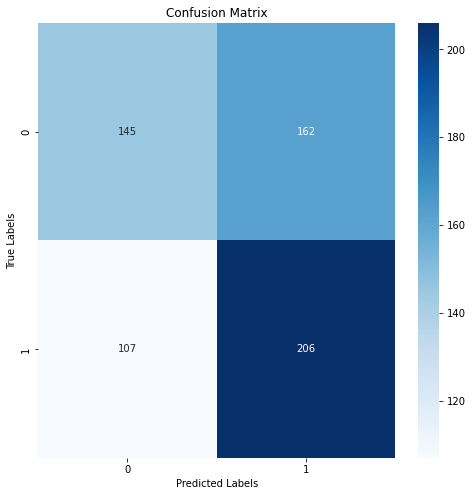

In [32]:
# Get the best estimator
log_reg_best_estimator = model_searcher.best_estimator_
y_test_pred = log_reg_best_estimator.predict(X_test_preprocessed)

evaluate_model("Logistic Regression (test data)", y_test, y_test_pred)

Gradient Boosting model

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.01, 0.5, 10)
MAX_DEPTH = range(2, 4)
N_ESTIMATORS = range(100, 250, 15)

PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the gradient boosting estimator
estimator = GradientBoostingClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.06444444444444444, 'max_depth': 2, 'n_estimators': 100}

Gradient Boosting (test data)
Accuracy: 0.57
Precision: 0.59
Recall: 0.59
F1-score: 0.59
ROC-AUC score: 0.57


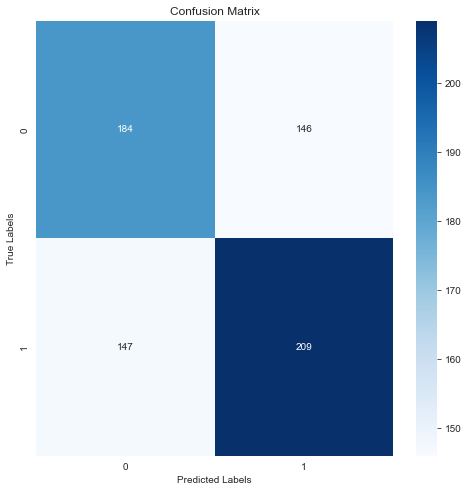

In [34]:
# Get the best estimator
gb_best_estimator = model_searcher.best_estimator_
y_test_pred = gb_best_estimator.predict(X_test_preprocessed)

evaluate_model("Gradient Boosting (test data)", y_test, y_test_pred)

Random Forest model

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Define the range of values for each hyperparameter
N_ESTIMATORS = range(50, 120, 15)
MAX_DEPTH = range(2, 4)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 5)

PARAM_GRID  = {
    'n_estimators': N_ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the random forest estimator
estimator = RandomForestClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 110}

Random Forest (test data)
Accuracy: 0.55
Precision: 0.57
Recall: 0.61
F1-score: 0.59
ROC-AUC score: 0.55


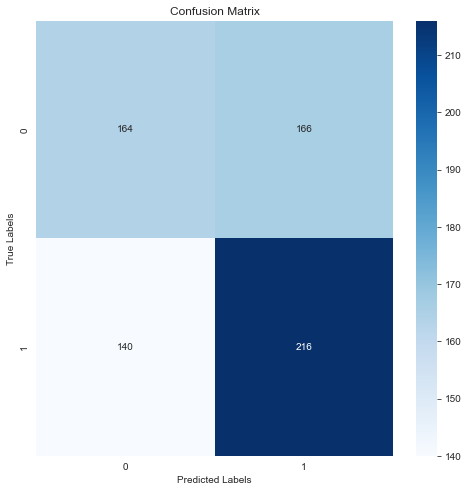

In [36]:
rf_best_estimator = model_searcher.best_estimator_
y_test_pred = rf_best_estimator.predict(X_test_preprocessed)

evaluate_model("Random Forest (test data)", y_test, y_test_pred)

XGBoost model

In [37]:
from xgboost import XGBClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.01, 1, 15)
MAX_DEPTH = range(1, 5)
N_ESTIMATORS = range(70, 180, 15)

PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the XGBoost estimator
estimator = XGBClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.08071428571428571, 'max_depth': 4, 'n_estimators': 70}

Evaluate the best model on the test data

XGBoost (test data)
Accuracy: 0.58
Precision: 0.59
Recall: 0.61
F1-score: 0.6
ROC-AUC score: 0.58


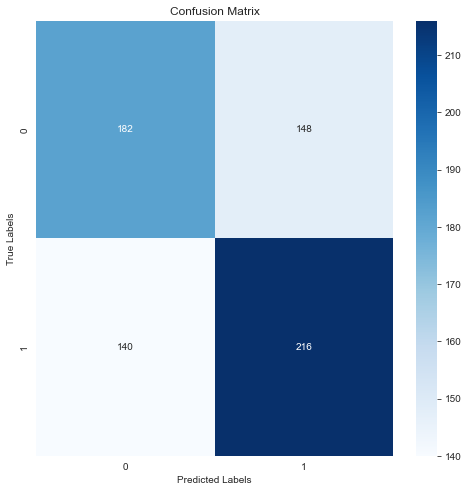

In [38]:
xgb_best_estimator = model_searcher.best_estimator_
y_test_pred = xgb_best_estimator.predict(X_test_preprocessed)

evaluate_model("XGBoost (test data)", y_test, y_test_pred)

TabNetClassifier with automatic hyperparameters tuning

In [39]:
!pip install pytorch-tabnet
!pip install optuna

In [40]:
# Convert Pandas DataFrame to NumPy array
X_train_np = X_train_preprocessed.values
X_test_np = X_test_preprocessed.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from sklearn.metrics import mean_squared_error

# Define objective function for optuna
def objective(trial):
    # Generate hyperparameter search space
    params = {
        'n_d': trial.suggest_int('n_d', 8, 64),
        'n_a': trial.suggest_int('n_a', 8, 64),
        'n_steps': trial.suggest_int('n_steps', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.1, 2.0),
        'n_independent': trial.suggest_int('n_independent', 1, 10),
        'n_shared': trial.suggest_int('n_shared', 1, 10),
        'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
        # 'optimizer_fn': torch.optim.Adam,
        # 'optimizer_params': dict(lr=2e-2, weight_decay=1e-5),
        # 'mask_type': 'entmax',
        # 'scheduler_params': dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
        # 'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
        'verbose': 0
    }

    # Create TabNetClassifier object with hyperparameters from optuna
    classifier = TabNetClassifier(**params)

    # Train and evaluate the model
    classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
    val_preds = classifier.predict_proba(X_test_np)[:, 1]
    val_auc = roc_auc_score(y_test, val_preds)

    return val_auc

# Create optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters using optuna
study.optimize(objective, n_trials=42, timeout=600)

# Get best hyperparameters from optuna
best_params = study.best_trial.params

# Train final model with best hyperparameters
tabnet_classifier = TabNetClassifier(**best_params)
tabnet_classifier.fit(X_train_np, y_train)
best_params

Evaluate the best model on the test data

In [ ]:
# Evaluate final model on test set
y_test_pred = tabnet_classifier.predict(X_test_np)
evaluate_model("Tabnet (test data)", y_test, y_test_pred)

The best model is Gradient Boosting

In [ ]:
the_best_model_ever = xgb_best_estimator

Feature importance

In [ ]:
feature_importances = pd.DataFrame(the_best_model_ever.feature_importances_,
                                   index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances